In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
from wordcloud import WordCloud
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

## Overview:

This project can be used as a complete guide to EDA and machine learning technique for sentence classification tasks accompanied with advice for practioners. It will cover:

* Exploratory Data Analysis .
* Tokenizing and preprocessing from text data
* Loading pretrained Bert and creating a deep learning model for fine-tuning
* Building and training model with PyTorch on HuggingFace framework

## Problem Statement:

Sarcasm detection is a narrow field of study in NLP, whose goal is to determine if a sentence is satirical or non-sarcastic. Sarcasm is a kind of phenomenon that is common in social networks, newspapers and it has a specific effect on listeners, such as teasing some events, breaking their expectations mood. Thus, properly understanding irony often requires a deep understanding of multiple sources of information, including how it is stated, the context of the conversation, and often some real-world events.

In this project, we aim to answer the question whether we identify sarcastic sentences automatically using ML/DL technique ? How do these techniques apply in this case and their performance?

## Import the data:

In [40]:
data = pd.read_csv("download.csv")

In [41]:
data.label.value_counts()

1    7527
0    7473
Name: label, dtype: int64

In [42]:
df = data[['comment', 'label']]

In [43]:
df.head()

,comment,label
0,"Well, let's be honest here, they don't actuall...",0
1,"Well, I didn't need evidence to believe in com...",1
2,"Who does an ""official promo"" in 360p?",0
3,Grotto koth was the best,1
4,Neal's back baby,1


## Data preprocessing:

In [44]:
df['comment'] = df['comment'].str.lower()




/var/folders/c2/_6j6y0bj21g39m2bth6d7_mc0000gn/T/ipykernel_15743/138908215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].str.lower()


In [45]:
df.head()


,comment,label
0,"well, let's be honest here, they don't actuall...",0
1,"well, i didn't need evidence to believe in com...",1
2,"who does an ""official promo"" in 360p?",0
3,grotto koth was the best,1
4,neal's back baby,1


In [46]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the title, text
df['comment'] = df['comment'].apply(lambda x:expand_contractions(x))

/var/folders/c2/_6j6y0bj21g39m2bth6d7_mc0000gn/T/ipykernel_15743/1352899652.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].apply(lambda x:expand_contractions(x))


In [47]:
df.head()


,comment,label
0,"well, let us be honest here, they do not actua...",0
1,"well, i did not need evidence to believe in co...",1
2,"who does an ""official promo"" in 360p?",0
3,grotto koth was the best,1
4,neal is back baby,1


In [48]:
# [@\^&\*\$] matches on the characters, you want to replace
#\S+matches on hash tags
# \S+[a-z0-9]\.(com|net|org) matches on domain names

df['comment'] = df['comment'].apply(lambda x: re.sub('[^a-zA-Z\s]+|X{2,}', '', x))

df['comment'] = df['comment'].apply(lambda x: re.sub("[@\^&\*\$]|#\S+|\S+[a-z0-9]\.(com|net|org)"," ",x))


/var/folders/c2/_6j6y0bj21g39m2bth6d7_mc0000gn/T/ipykernel_15743/3231232655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].apply(lambda x: re.sub('[^a-zA-Z\s]+|X{2,}', '', x))
/var/folders/c2/_6j6y0bj21g39m2bth6d7_mc0000gn/T/ipykernel_15743/3231232655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comment'] = df['comment'].apply(lambda x: re.sub("[@\^&\*\$]|#\S+|\S+[a-z0-9]\.(com|net|org)"," ",x))


In [49]:
df.head()


,comment,label
0,well let us be honest here they do not actuall...,0
1,well i did not need evidence to believe in com...,1
2,who does an official promo in p,0
3,grotto koth was the best,1
4,neal is back baby,1


In [50]:
df['CharCount'] = df['comment'].apply(lambda x: len(x))
df['WordCount'] = df['comment'].apply(lambda x: len(x.split()))

/var/folders/c2/_6j6y0bj21g39m2bth6d7_mc0000gn/T/ipykernel_15743/3420036035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CharCount'] = df['comment'].apply(lambda x: len(x))
/var/folders/c2/_6j6y0bj21g39m2bth6d7_mc0000gn/T/ipykernel_15743/3420036035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordCount'] = df['comment'].apply(lambda x: len(x.split()))


In [51]:
df.head()


,comment,label,CharCount,WordCount
0,well let us be honest here they do not actuall...,0,123,24
1,well i did not need evidence to believe in com...,1,52,10
2,who does an official promo in p,0,31,7
3,grotto koth was the best,1,24,5
4,neal is back baby,1,17,4


### Visualization of Length of sentence distribution

<AxesSubplot: title={'center': 'Length of sentence Distribution'}, xlabel='Length', ylabel='The Number of Sentence'>

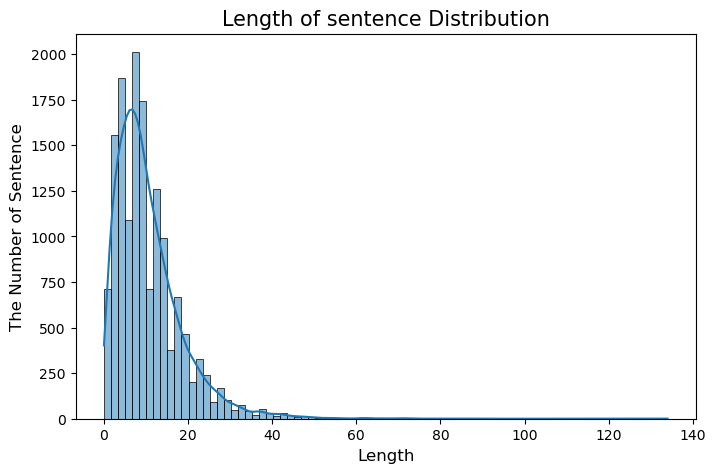

In [53]:
plt.figure(figsize = (8, 5))
plt.title('Length of sentence Distribution', fontsize=15)
plt.xlabel("Length", fontsize=12)
plt.ylabel("The Number of Sentence", fontsize=12)

sns.histplot(df, x='WordCount',
             kde = True, 
             bins = 80
             )

In [ ]:
plt.figure(figsize = (7, 4))
sns.countplot(x = df.label, data = df, saturation=0.5)
plt.title('Sarcasm data Distribution', fontsize=12)
plt.xlabel("Label", fontsize=12)
plt.ylabel("The Number of label", fontsize=12)

In [57]:
def get_top_nwords(x, n, i):
    vec = CountVectorizer(ngram_range=(i,i)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    return words_freq[:n]

### Create N-Gram

In [59]:
# Bigram
words = get_top_nwords(df.comment, 20, 2) 
df_bi = pd.DataFrame(words, columns=['Bigram', 'Frequency'])
df_bi.head()

,Bigram,Frequency
0,it is,941
1,do not,600
2,that is,497
3,in the,456
4,you are,433


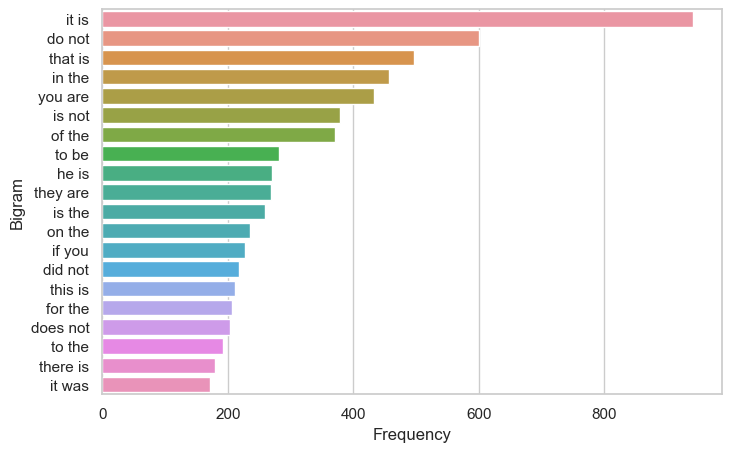

In [61]:
plt.figure(figsize = (8, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y='Bigram', x='Frequency', orient = "h", data=df_bi)

## Generating WordClouds

We use Word Cloud, which is a data visualization technique, to represent text data in different size of each word corresponding to its frequency or importance. In this project, we use the library wordcloud For generating word cloud in Python.

In [62]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

There are 840985 words in the combination of headlines.


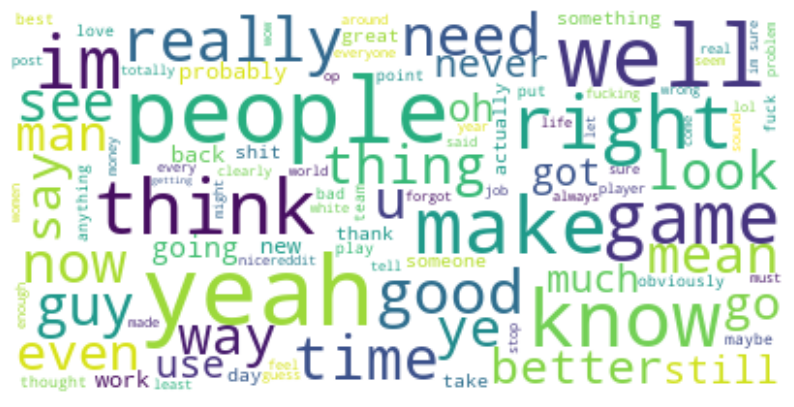

In [64]:
# Wordcloud 
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["one", "first", "will", "want", "give"])


texts = " ".join(text for text in df.comment)
print ("There are {} words in the combination of headlines.".format(len(texts)))
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      stopwords=stopwords,
                      background_color="white").generate(texts)

# Display the generated image:
plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review.png")

## Building ML models

### Tokenizer

In [65]:
def tokenize(text):
    # Remove punctuation characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [66]:
X = df.comment
Y = df.label
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [67]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jervissaldanha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jervissaldanha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Random Forest

In [87]:
# Instantiate transformers and classifier
vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = RandomForestClassifier()


# Fit and/or transform each to the training data
# Hint: you can use the fit_transform method
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)

# Fit or train the classifier
clf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [88]:
# Transform test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

# Predict test labels
y_pred = clf.predict(X_test_tfidf)

In [89]:
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66      2482
           1       0.66      0.61      0.63      2468

    accuracy                           0.65      4950
   macro avg       0.65      0.65      0.65      4950
weighted avg       0.65      0.65      0.65      4950



In [90]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6469587513076323

## Gaussian Naive Bayes model

In [91]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train_tfidf.toarray(), y_train)


# Predict test labels
y_pred = model.predict(X_test_tfidf.toarray())

print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.29      0.38      2482
           1       0.52      0.78      0.63      2468

    accuracy                           0.53      4950
   macro avg       0.55      0.54      0.50      4950
weighted avg       0.55      0.53      0.50      4950



In [92]:
roc_auc_score(y_test, y_pred)

0.5350385008691428

## SVM

In [93]:
from sklearn import svm

In [95]:
model = svm.SVC(kernel='linear', gamma=1) 

# Train the model using the training sets
model.fit(X_train_counts, y_train)

# Predict test labels
y_pred = model.predict(X_test_counts.toarray())

print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63      2482
           1       0.62      0.58      0.60      2468

    accuracy                           0.62      4950
   macro avg       0.62      0.62      0.61      4950
weighted avg       0.62      0.62      0.62      4950



In [94]:
roc_auc_score(y_test, y_pred)

0.5350385008691428

## KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

# Train the model using the training sets
knn.fit(X_train_tfidf.toarray(), y_train)

# Predict test labels
y_pred = knn.predict(X_test_tfidf.toarray())

print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.92      0.66      2482
           1       0.62      0.12      0.21      2468

    accuracy                           0.53      4950
   macro avg       0.57      0.52      0.43      4950
weighted avg       0.57      0.53      0.43      4950



In [97]:
roc_auc_score(y_test, y_pred)

0.5239205260044117

## BERT

Bidirectional Encoder Representations from Transformers (BERT) is a state of the art model based on transformers developed by google. It can be pre-trained and later fine-tuned for a specific task. We will fine-tune bert on a classification task.

Bert was trained on two tasks simultaneously

Masked language modelling (MLM) — 15% of the tokens were masked and was trained to predict the masked word
Next Sentence Prediction(NSP) — Given two sentences A and B, predict whether B follows A
The framework HugggingFace provides us a shortcut to easily download and train state-of-the-art pretrained models. Using pretrained models can reduce your compute costs, carbon footprint, and save you time from training a model from scratch. In this project, we choose to fine-tune the TinyBert due to the limited hardware GPU for a classification task

In [68]:
from transformers import BertTokenizer, BertModel
import torch
from torch import nn
from torch.optim import Adam
from tqdm import tqdm

In [69]:
tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')

Downloading: 100%|██████████| 232k/232k [00:00<00:00, 241kB/s]  
Downloading: 100%|██████████| 285/285 [00:00<00:00, 175kB/s]


In [71]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, X, Y):

        self.labels = np.array(Y)
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512,
                                # truncation=True,
                                return_tensors="pt") for text in X]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [72]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('prajjwal1/bert-tiny')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(128, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

In [78]:
def train(model, X,Y, learning_rate, epochs, batch_size):

    train = Dataset(X,Y)
    # , Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
    # val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    # device = torch.device("cuda" if use_cuda else "cpu")
    device = "mps" if torch.backends.mps.is_available() else "cpu"


    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label)
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
           
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(X): .3f} | Train Accuracy: {total_acc_train / len(X): .3f}')



In [76]:
def evaluate(model, X,Y, batch_size):

    test = Dataset(X, Y)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size,shuffle=False)

    use_cuda = torch.cuda.is_available()
    # device = torch.device("cuda" if use_cuda else "cpu")
    device = "mps" if torch.backends.mps.is_available() else "cpu"

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    y_pred = []
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)

            output = model(input_id, mask)
            y_pred.append(output.argmax(dim=1))

    return y_pred

In [77]:
EPOCHS = 5
batch_size = 32
model = BertClassifier()
LR = 1e-4
              
train(model, X_train, y_train, LR, EPOCHS, batch_size)

Downloading: 100%|██████████| 17.8M/17.8M [00:01<00:00, 16.5MB/s]
Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 315/315 [01:36<00:00,  3.26it/s]


Epochs: 1 | Train Loss:  0.022 | Train Accuracy:  0.518


100%|██████████| 315/315 [01:37<00:00,  3.24it/s]


Epochs: 2 | Train Loss:  0.021 | Train Accuracy:  0.597


100%|██████████| 315/315 [01:39<00:00,  3.18it/s]


Epochs: 3 | Train Loss:  0.019 | Train Accuracy:  0.683


100%|██████████| 315/315 [01:35<00:00,  3.28it/s]


Epochs: 4 | Train Loss:  0.016 | Train Accuracy:  0.754


100%|██████████| 315/315 [02:32<00:00,  2.06it/s] 

Epochs: 5 | Train Loss:  0.011 | Train Accuracy:  0.835


In [79]:
y_pred = evaluate(model, X_test,y_test, batch_size)

In [81]:
y_pred_ = torch.cat(y_pred, dim=0)


In [83]:
y_pred_=y_pred_.cpu().detach().numpy()

In [86]:
print(classification_report(y_test.values, y_pred_))
print(roc_auc_score(y_test, y_pred_))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67      2482
           1       0.68      0.52      0.59      2468

    accuracy                           0.64      4950
   macro avg       0.64      0.64      0.63      4950
weighted avg       0.64      0.64      0.63      4950

0.6362422080796973


## Model Performance Comparaison

Random forest and BERT have better performance in comparison to other techniques such as Gaussian Naive Bayes, SVM and KNN as they have relatively better f1-scores